# Search: Solving a Maze Using a Goal-based Agent

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## Introduction

The agent has a map of the maze it is in and the environment is assumed to be **deterministic, discrete, and known.** The agent must use the map to plan a path through the maze from the starting location $S$ to the goal location $G$.  This is a planing exercise for a goal-based agent, so you do not need to implement an environment, just use the map to search for a path. Once the plan is made, the agent in a deterministic environment (i.e., the transition function is deterministic with the outcome of each state/action pair fixed and no randomness) can just follow the path and does not need to care about the percepts.
This is also called an **[open-loop system](https://en.wikipedia.org/wiki/Open-loop_controller).**
The execution phase is trivial and we do not implement it in this exercise.

Tree search algorithm implementations that you find online and used in general algorithms courses have often a different aim. These algorithms assume that you already have a tree in memory. We are interested in dynamically creating a search tree with the aim of finding a good/the best path from the root noteto the goal state. Follow the pseudo code presented in the text book (and replicated in the slides) closely. Ideally, we would like to search only a small part of the maze, i.e., create a search tree with as few nodes as possible. 

Several mazes for this exercise are stored as text files. Here is the small example maze:

In [2]:
with open("small_maze.txt", "r") as f:
    maze_str = f.read()
print(maze_str)

XXXXXXXXXXXXXXXXXXXXXX
X XX        X X      X
X    XXXXXX X XXXXXX X
XXXXXX     S  X      X
X    X XXXXXX XX XXXXX
X XXXX X         X   X
X        XXX XXX   X X
XXXXXXXXXX    XXXXXX X
XG         XX        X
XXXXXXXXXXXXXXXXXXXXXX



__Note:__ The mazes above contains cycles and therefore the state space may not form proper trees unless cycles are prevented. Therfore, you will need to deal with cycle detection in your code.

## Parsing and pretty printing the maze

The maze can also be displayed in color using code in the module [maze_helper.py](maze_helper.py). The code parses the string representing the maze and converts it into a `numpy` 2d array which you can use in your implementation. Position are represented as a 2-tuple of the form `(row, col)`. 

In [3]:
import maze_helper as mh

test_maze = mh.parse_maze(maze_str)

# look at a position in the maze by subsetting the 2d array
print("Position(0,0):", test_maze[0, 0])

# there is also a helper function called `look(maze, pos)` available
# which uses a 2-tuple for the position.
print("Position(8,1):", mh.look(test_maze, (8, 1)))

Position(0,0): X
Position(8,1): G


A helper function to visualize the maze is also available.

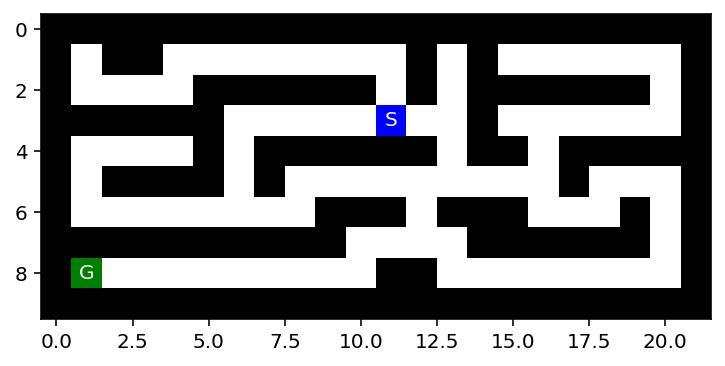

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# use higher resolution images in notebook

mh.show_maze(test_maze)
print(mh.look(test_maze,(1,1)))

Find the position of the start and the goal using the helper function `find_pos()`

In [4]:
print("Start location:", mh.find_pos(test_maze, what = "S"))
print("Goal location:", mh.find_pos(test_maze, what = "G"))

Start location: (3, 11)
Goal location: (8, 1)


Helper function documentation.

In [5]:
help(mh)

Help on module maze_helper:

NAME
    maze_helper

DESCRIPTION
    Code for the Maze Assignment by Michael Hahsler
    Usage: 
        import maze_helper as mh
        mh.show_some_mazes()

FUNCTIONS
    find_pos(maze, what='S')
        Find start/goal in a maze and returns the first one. 
        Caution: there is no error checking!
        
        Parameters:
        maze: a array with characters prodced by parse_maze()
        what: the letter to be found ('S' for start and 'G' for goal)
        
        Returns:
        a tupple (x, y) for the found position.
    
    look(maze, pos)
        Look at the label of a square with the position as an array of the form (x, y).
    
    parse_maze(maze_str)
        Convert a maze as a string into a 2d numpy array
    
    show_maze(maze, fontsize=10)
        Display a (parsed) maze as an image.
    
    welcome()
        Welcome message.

FILE
    c:\users\kellen long\onedrive\documents\github\cs7320-ai\search\maze_helper.py




## Tree structure

Here is an implementation of the basic node structure for the search algorithms (see Fig 3.7 on page 73). I have added a method that extracts the path from the root node to the current node. It can be used to get the path when the search is completed.

In [6]:
class Node:
    def __init__(self, pos, parent, action, cost):
        self.pos = tuple(pos)    # the state; positions are (row,col)
        self.parent = parent     # reference to parent node. None means root node.
        self.action = action     # action used in the transition function (root node has None)
        self.cost = cost         # for uniform cost this is the depth. It is also g(n) for A* search

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"
    
    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]
    
        while not node.parent is None:
            node = node.parent
            path.append(node)
        
        path.reverse()
        
        return(path)

    def path_cost(self):
        # returns the cost of the path
        sum = 0
        for val in self.get_path_from_root():
            sum += val.cost
        return sum

If needed, then you can add more fields to the class like the heuristic value $h(n)$ or $f(n)$.

Examples for how to create and use a tree and information on memory management can be found [here](../Python_Code_Examples/trees.ipynb).

# Tasks

The goal is to:

1. Implement the following search algorithms for solving different mazes:

    - Breadth-first search (BFS)
    - Depth-first search (DFS)
    - Greedy best-first search (GBFS)
    - A* search

2. Run each of the above algorithms on the 
    - [small maze](small_maze.txt), 
    - [medium maze](medium_maze.txt), 
    - [large maze](large_maze.txt), 
    - [open maze](open_maze.txt),
    - [wall maze](wall_maze.txt),
    - [loops maze](loops_maze.txt),
    - [empty maze](empty_maze.txt), and
    - [empty 2_maze](empty_2_maze.txt).
    
3. For each problem instance and each search algorithm, report the following in a table:

    - The solution and its path cost
    - Total number of nodes expanded
    - Maximum tree depth
    - Maximum size of the frontier

4. Display each solution by marking every maze square (or state) visited and the squares on the final path.

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Defining the search problem and determining the problem size [10 Points]

Define the components of the search problem:

* Initial state
* Actions
* Transition model
* Goal state
* Path cost

Use verbal descriptions, variables and equations as appropriate. 

*Note:* You can swich the next block from code to Markdown and use formating.

Initial state: the agent is at the starting position with no searching trees developed
Actions: {up, down, left, right}
Transition model: results(s,a)=s'
  * if there is an intersection, copy the node for searching purposes and move each node in different directions

Goal state: the agent has reached the goal
Path cost: uniform 1

Give some estimates for the problem size:

* $n$: state space size
* $d$: depth of the optimal solution
* $m$: maximum depth of tree
* $b$: maximum branching factor

Describe how you would determine these values for a given maze.

My understanding for the problem:
* $n$: state space size - the amount of nodes the search encounters
* $d$: depth of the optimal solution - the length of nodes to the exit of the maze
* $m$: maximum depth of tree - the length of the longest chain of nodes that were searched
* $b$: maximum branching factor - the number of intersections encountered

These values change with the amount of intersections, the size of the maze, and the complexity of the maze. For example, in a large maze with no walls, the state space size would be large, the depth of the optimal solution would be relatively small, the maximum depth of the tree would (hopefully) be low, and the branching factor would be 3 (because there are 3 branches that are made every step. For a large maze with few open tiles and a simple layout, the state space would be lower than the open maze, the depth would be higher, the maximum depth would also likely be higher, and the maximum branching factor would be much lower as well.

## Task 2: Uninformed search: Breadth-first and depth-first [40 Points]

Implement these search strategies. Follow the pseudocode in the textbook/slides. You can use the tree structure shown above to extract the final path from your solution.

__Notes:__
* You can find maze solving implementations online that use the map to store information. While this is an effective idea for this two-dimensional navigation problem, it typically cannot be used for other search problems. Therefore, follow the textbook and only store information in the tree created during search, and use the `reached` and `frontier` data structures.
* DFS can be implemented using the BFS tree search algorithm and simply changing the order in which the frontier is expanded (this is equivalent to best-first search with path length as the criterion to expand the next node). However, to take advantage of the significantly smaller memory footprint of DFS, you need to implement DFS in a different way without a `reached` data structure and by releasing the memory for nodes that are not needed anymore.
* If DFS does not use a `reached` data structure, then its cycle checking abilities are limited. Remember, that DSF is incomplete if cycles cannot be prevented. You will see in your experiments that open spaces are a problem.

In [7]:
import numpy as np


# Your code goes here
def breadth_first_search(maze):
    root = Node(mh.find_pos(maze,"S"),None,None,0)
    frontier = [root]
    reached = [root.pos]


    # A few tools to make it easier to iterate over things
    directions = {"up",  "down",  "left",  "right"}
    xdelta = {"up":-1,  "down":1,  "left":0,  "right":0}
    ydelta = {"up":0,  "down":0,  "left":-1,  "right":1}
    opposite = {"up":"down",  "down":"up",  "left":"right",  "right":"left", None:"None"}

    #helps track information
    information = {"Path Cost":0, "# of Nodes":0,"Max_Depth":0,"# Nodes in memory":0,"Frontier Size":0}

    # The engine of the breadth first search, ends when the current searching node is the goal or the queue is empty
    while len(frontier) > 0:

        information["Frontier Size"] = max(information["Frontier Size"],len(frontier))
        curr = frontier.pop(0)
        for move in directions:
            # The following if statement tests for 3 things
            # 1. That the next action cannot be opposite the last (ie. going backwards)
            # 2. That the next action does not move into a wall
            # 3. That the next action has not been traversed yet
            if opposite[curr.action] != move and mh.look(maze,(curr.pos[0]+xdelta[move],  curr.pos[1]+ydelta[move])) != 'X':
                # The move has now been determined to be viable, and the new node for that direction is added to the frontier list and that position is added to the reached structure
                next = Node((curr.pos[0]+xdelta[move],curr.pos[1]+ydelta[move]), curr, move, curr.cost+1)
                information["# of Nodes"] += 1
                # Next if statement helps with presenting the map
                if not curr.pos == mh.find_pos(maze,"S") and mh.look(maze,(curr.pos[0]+xdelta[move],  curr.pos[1]+ydelta[move]))!="G":
                    maze[curr.pos] = "."
                    maze[next.pos] = "P"
                # Checking if the current node is the solution
                if mh.look(maze,next.pos)=='G':
                    for place in curr.get_path_from_root():
                        maze[place.pos] = 'F' if maze[place.pos]!='S' else 'S'
                    # mh.show_maze(maze)
                    information["Path Cost"] = curr.path_cost()
                    information["Max_Depth"] = max(information["Max_Depth"],len(curr.get_path_from_root())-1)
                    return information
                # If this is not the solution, add to the queue and continue
                if (curr.pos[0]+xdelta[move],curr.pos[1]+ydelta[move]) not in reached:
                    reached.append((curr.pos[0]+xdelta[move],curr.pos[1]+ydelta[move]))
                    information["Max_Depth"] = max(information["Max_Depth"],len(next.get_path_from_root())-1)
                    frontier.append(next)

    return "Failure"


def depth_first_search(maze):
    root = Node(mh.find_pos(maze,"S"),None,None,0)
    frontier = [root]


    # The same tools as earlier to make it easier to use the functions
    directions = {"down",  "up",  "left",  "right"}
    xdelta = {"up":-1,  "down":1,  "left":0,  "right":0}
    ydelta = {"up":0,  "down":0,  "left":-1,  "right":1}
    opposite = {"up":"down",  "down":"up",  "left":"right",  "right":"left", None:"None"}

    def no_cycles(node): #returns false if there is a cycle, true otherwise
        position = node.pos
        curr = node
        while curr.parent is not None:
            curr = curr.parent
            if curr.pos == position:
                return False
        return True

    information = {"Path Cost":0, "# of Nodes":0,"Max_Depth":0,"# Nodes in memory":0,"Frontier Size":0}

    while len(frontier)>0:

        # mh.show_maze(maze)

        information["Frontier Size"] = max(information["Frontier Size"],len(frontier))
        curr = frontier.pop()
        # Checking if the current node is the solution
        if mh.look(maze,curr.pos)=='G':
            for place in curr.get_path_from_root():
                maze[place.pos] = 'F' if (maze[place.pos]!='S' and maze[place.pos]!='G') else maze[place.pos]
            # mh.show_maze(maze)
            information["Path Cost"] = curr.path_cost()
            information["Max_Depth"] = max(information["Max_Depth"],len(curr.get_path_from_root())-1)
            return information
        for move in directions:
            #the same if statement as in BFS
            if opposite[curr.action] != move and mh.look(maze,(curr.pos[0]+xdelta[move],  curr.pos[1]+ydelta[move])) != 'X':
                next = Node((curr.pos[0]+xdelta[move],  curr.pos[1]+ydelta[move]),curr,move,curr.cost+1)
                information["# of Nodes"] += 1
                if no_cycles(next):
                    # This is a valid addition and is added back to the frontier
                    frontier.append(next)
                    information["Max_Depth"] = max(information["Max_Depth"],len(next.get_path_from_root())-1)
                    # Helps with displaying the maze
                    if next.parent is not None:
                        maze[curr.pos] = '.' if (maze[curr.pos]!='S' and maze[curr.pos]!='G') else maze[next.parent.pos]
                        maze[next.pos] = 'P' if (maze[next.pos]!='S' and maze[next.pos]!='G') else maze[next.pos]
    return "failure"





### How does BFS and DFS deal with loops (cycles)?

BFS and DFS both deal with cycles in different ways. Since a BFS is a minimum spanning tree, it must make sure there are no collisions anywhere in the map by keeping track of every single node. DFS, however, does not need to check for any collisions, just if there are any cycles in the path it currently follows. This leads to a much more efficient state space for DFS than BFS, but there can still be considerable overlap if there are enough branches that pass by each other.

### Are your implementations complete and optimal? Explain why. What is the time and space complexity of each of **your** implementations

The implementations are complete, but DFS is not optimal. BFS finds the closest path that reaches a goal, but DFS just finds a working solution; this may not necessarily be the shortest path.

| Algorithm | BFS        | DFS      |
|-----------|------------|----------|
| Time      | $O(b^{d})$ | $O(b^{m})$ |
| Space     | $O(b^{d})$ | $O(bm)$ |


For breadh first search, the time and space complexity are the value of the sum of a $b$-ary tree $d$ nodes long. DFS has a space complexity that is the sum of a $b$-ary tree $m$ nodes long, and has a linear space complexity, because it only stores one chain of nodes. Notice BFS is $b$ to the *d*, where DFS is $b$ to the *m*. This is because the longest chain of nodes in BFS is always the one to the solution, while the longest chain of nodes in DFS does not necessarily go to the solution.



## Task 3: Informed search: Implement greedy best-first search and A* search  [20 Points]

You can use the map to estimate the distance from your current position to the goal using the Manhattan distance (see https://en.wikipedia.org/wiki/Taxicab_geometry) as a heuristic function. Both algorithms are based on Best-First search which requires only a small change from the BFS algorithm you have already implemented (see textbook/slides). 

In [8]:
from math import sqrt
import maze_helper as mh

from queue import PriorityQueue


def calc_distance(coord1,coord2):
    return (abs(coord1[0]-coord2[0]))+(abs(coord1[1]-coord2[1]))

def information(frontier):
    counter = 0
    max_depth = 0
    nodes = 0
    for i in frontier:
        counter +=1
        temp_depth = 0
        while i.parent is not None:
            nodes += 1
            temp_depth += 1
        max_depth = max(max_depth,temp_depth)
    return (max_depth,nodes,counter)




class HeuristicNode:
    def __init__(self, heuristic, pos, parent, action, cost):
        self.heuristic = heuristic  # the heuristic value of the node
        self.pos = tuple(pos)       # the state; positions are (row,col)
        self.parent = parent        # reference to parent node. None means root node.
        self.action = action        # action used in the transition function (root node has None)
        self.cost = cost            # for uniform cost this is the depth. It is also g(n) for A* search

    def __lt__(self,other):
        return self.heuristic < other.heuristic

    def __str__(self):
        return f"Node - pos = {self.pos}; action = {self.action}; cost = {self.cost}"

    def get_path_from_root(self):
        """returns nodes on the path from the root to the current node."""
        node = self
        path = [node]

        while not node.parent is None:
            node = node.parent
            path.append(node)

        path.reverse()

        return(path)

    def path_cost(self):
        # returns the cost of the path
        sum = 0
        for val in self.get_path_from_root():
            sum += val.cost
        return sum



def greedy_best_first_search(maze):
    def heuristic(pos1,pos2):
        return abs(pos1[0]-pos2[0])+abs(pos1[1]-pos2[1])

    def better_path(frontier,node): #returns a boolean expressing if there is a better path
        for temp in frontier:
            if temp.pos == node.pos and temp.cost < node.cost:
                return True
        return False

    # The same tools as earlier to make it easier to use the functions
    directions = {"down",  "up",  "left",  "right"}
    xdelta = {"up":-1,  "down":1,  "left":0,  "right":0}
    ydelta = {"up":0,  "down":0,  "left":-1,  "right":1}
    opposite = {"up":"down",  "down":"up",  "left":"right",  "right":"left", None:"None"}

    root = HeuristicNode(heuristic(mh.find_pos(maze,"S"),mh.find_pos(maze,"G")),mh.find_pos(maze,"S"),None,None,0)
    frontier = PriorityQueue()
    frontier.put(root)
    reached = {root.pos: root}
    counter = 1

    information = {"Path Cost":0, "# of Nodes":0,"Max_Depth":0,"# Nodes in memory":0,"Frontier Size":0}

    while counter>0:
        information["Frontier Size"] = max(information["Frontier Size"],counter)
        # print("about to sort")
        # frontier.sort(key=lambda x:x.heuristic)
        # print(len(frontier),frontier[len(frontier)-1])
        curr = frontier.get()
        counter -= 1
        if mh.look(maze,curr.pos)=='G':
            for place in curr.get_path_from_root():
                maze[place.pos] = 'F' if (maze[place.pos]!='S' and maze[place.pos]!='G') else maze[place.pos]
            # mh.show_maze(maze)
            information["Path Cost"] = curr.path_cost()
            information["Max_Depth"] = max(information["Max_Depth"],len(curr.get_path_from_root())-1)
            return information
        for move in directions:
            if opposite[curr.action] != move and mh.look(maze,(curr.pos[0]+xdelta[move],  curr.pos[1]+ydelta[move])) != 'X':
                next = HeuristicNode(heuristic((curr.pos[0]+xdelta[move],curr.pos[1]+ydelta[move]),mh.find_pos(maze,"G")),(curr.pos[0]+xdelta[move],curr.pos[1]+ydelta[move]),curr,move,1)
                information["# of Nodes"] += 1
                # Checking for value in reached or better path
                if next not in reached or (heuristic(next.pos,mh.find_pos(maze,"G"))<reached[next.pos].heuristic):
                    reached[next.pos] = next
                    # adding back to the frontier
                    frontier.put(next)
                    information["Max_Depth"] = max(information["Max_Depth"],len(next.get_path_from_root())-1)
                    counter += 1
                    maze[curr.pos] = '.' if (maze[curr.pos]!='S' and maze[curr.pos]!='G') else maze[next.parent.pos]
                    maze[next.pos] = 'P' if (maze[next.pos]!='S' and maze[next.pos]!='G') else maze[next.pos]
    return "failure"


def A_star_search(maze):
    def heuristic(pos1,pos2):
        return abs(pos1[0]-pos2[0])+abs(pos1[1]-pos2[1])

    def better_path(frontier,node): #returns a boolean expressing if there is a better path
        for temp in frontier:
            if temp.pos == node.pos and temp.cost < node.cost:
                return True
        return False

    # The same tools as earlier to make it easier to use the functions
    directions = {"down",  "up",  "left",  "right"}
    xdelta = {"up":-1,  "down":1,  "left":0,  "right":0}
    ydelta = {"up":0,  "down":0,  "left":-1,  "right":1}
    opposite = {"up":"down",  "down":"up",  "left":"right",  "right":"left", None:"None"}

    root = HeuristicNode(heuristic(mh.find_pos(maze,"S"),mh.find_pos(maze,"G")),mh.find_pos(maze,"S"),None,None,0)
    frontier = PriorityQueue()
    frontier.put(root)
    reached = {root.pos: root}
    counter = 1

    information = {"Path Cost":0, "# of Nodes":0,"Max_Depth":0,"# Nodes in memory":0,"Frontier Size":0}

    while counter>0:
        information["Frontier Size"] = max(information["Frontier Size"],counter)
        curr = frontier.get()
        counter -= 1
        # If this is the solution
        if mh.look(maze,curr.pos)=='G':
            for place in curr.get_path_from_root():
                maze[place.pos] = 'F' if (maze[place.pos]!='S' and maze[place.pos]!='G') else maze[place.pos]
            # mh.show_maze(maze)
            information["Path Cost"] = curr.path_cost()
            information["Max_Depth"] = max(information["Max_Depth"],len(curr.get_path_from_root())-1)
            return information
        for move in directions:
            if opposite[curr.action] != move and mh.look(maze,(curr.pos[0]+xdelta[move],  curr.pos[1]+ydelta[move])) != 'X':
                next = HeuristicNode(heuristic((curr.pos[0]+xdelta[move],curr.pos[1]+ydelta[move]),mh.find_pos(maze,"G"))+curr.cost,(curr.pos[0]+xdelta[move],curr.pos[1]+ydelta[move]),curr,move,1+curr.cost)
                information["# of Nodes"] += 1
                if next not in reached or (heuristic(next.pos,mh.find_pos(maze,"G"))<reached[next.pos].heuristic):
                    # Adding back to the frontier
                    reached[next.pos] = next
                    frontier.put(next)
                    information["Max_Depth"] = max(information["Max_Depth"],len(next.get_path_from_root())-1)
                    counter += 1
                    maze[curr.pos] = '.' if (maze[curr.pos]!='S' and maze[curr.pos]!='G') else maze[next.parent.pos]
                    maze[next.pos] = 'P' if (maze[next.pos]!='S' and maze[next.pos]!='G') else maze[next.pos]
    return "failure"


### Are your implementations complete and optimal? What is the time and space complexity?

A* is both complete and optimal, while greedy best first search is complete but not optimal. The shortcoming of greedy bfs is that it never takes the past path into account.

| Algorithm | A*         | Greedy BFS |
|-----------|------------|------------|
| Space     | $O(b^{m})$ | $O(b^{m})$ |
| Time      | $O(b^{m})$ | $O(b^{m})$ |

The time complexity of Greedy BFS is $O(b^m)$ - as stated earlier - in the worst case. In the best case, it can actually end up as $O(bm)$ given a perfect heuristic. It has the same property of the time complexity ($O(b^{m})$ worst case, $O(bm)$ best case).
A*, however, has a less concrete space and time complexity. The complexity is the sum of all of the tiles that have a better heuristic than the starting node, which makes it about half of the worst case for greedy best-first search on the small maze, but it never gets down to $O(bm)$.
This makes greedy best-first search better for larger spaces, as a quadratic runtime is much better than half of an exponential. However, A* searches the exact amount of spaces required to find the optimal search, which is exactly however many squares are better than its heuristic. This is why the greedy best-first search often misses the best solution, because it trades off doing less computation for finding less of the optimal solutions.


## Task 4: Comparison and discussion [20 Points] 

Run experiments to compare the implemented algorithms.

How to deal with issues:

* Your implementation returns unexpected results: Try to debug and fix the code. Visualizing the maze, the current path and the frontier after every step is very helpful. If the code still does not work, then mark the result with an asterisk (*) and describe the issue below the table.

* Your implementation cannot consistently solve a specific maze and ends up in an infinite loop:
    Debug. If it is a shortcoming of the algorithm/implementation, then put "N/A*" in the results table and describe why this is happening.

In [10]:
unproblematic_maze_list = ["empty_2_maze.txt","empty_maze.txt","L_maze.txt","large_maze.txt","small_maze.txt","wall_maze.txt"]
for maze in unproblematic_maze_list:
    bfs = breadth_first_search(mh.parse_maze(open(maze, "r").read()))
    print(maze,"bfs",(bfs if bfs!="failure" else "failed"))
    dfs = depth_first_search(mh.parse_maze(open(maze, "r").read()))
    print(maze,"dfs",(dfs if dfs!="failure" else "failed"))
    gbfs = greedy_best_first_search(mh.parse_maze(open(maze, "r").read()))
    print(maze,"gbfs",(gbfs if gbfs!="failure" else "failed"))
    aSs = A_star_search(mh.parse_maze(open(maze, "r").read()))
    print(maze,"aSs",(aSs if aSs!="failure" else "failed"))

empty_2_maze.txt bfs {'Path Cost': 91, '# of Nodes': 243, 'Max_Depth': 14, '# Nodes in memory': 0, 'Frontier Size': 12}
empty_2_maze.txt dfs {'Path Cost': 3916, '# of Nodes': 238, 'Max_Depth': 88, '# Nodes in memory': 0, 'Frontier Size': 81}
empty_2_maze.txt gbfs {'Path Cost': 14, '# of Nodes': 43, 'Max_Depth': 14, '# Nodes in memory': 0, 'Frontier Size': 30}
empty_2_maze.txt aSs {'Path Cost': 105, '# of Nodes': 370, 'Max_Depth': 14, '# Nodes in memory': 0, 'Frontier Size': 248}
empty_maze.txt bfs {'Path Cost': 91, '# of Nodes': 244, 'Max_Depth': 14, '# Nodes in memory': 0, 'Frontier Size': 11}
empty_maze.txt dfs {'Path Cost': 171, '# of Nodes': 44, 'Max_Depth': 18, '# Nodes in memory': 0, 'Frontier Size': 27}
empty_maze.txt gbfs {'Path Cost': 14, '# of Nodes': 43, 'Max_Depth': 14, '# Nodes in memory': 0, 'Frontier Size': 30}
empty_maze.txt aSs {'Path Cost': 105, '# of Nodes': 187, 'Max_Depth': 14, '# Nodes in memory': 0, 'Frontier Size': 126}
L_maze.txt bfs {'Path Cost': 91, '# of Nod

*note: I only included the mazes that worked for all searches

Complete the following table for each maze.

__Empty 2 maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 91        | 244                 | 14             | 244                      | 11                |
| DFS       | 171       | 44                  | 18             | 44                       | 27                |
| GBS       | 14        | 43                  | 14             | 43                       | 30                 |
| A*        | 105       | 187                 | 14             | 187                      | 126               |

__Empty maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 91        | 243                 | 14             | 243                      | 12                |
| DFS       | 3916      | 238                 | 88             | 238                      | 81                |
| GBS       | 14        | 43                  | 14             | 43                       | 30                |
| A*        | 105       | 370                 | 14             | 370                      | 248               |

__L maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 91        | 341                 | 14             | 341                      | 19                |
| DFS       | 9870      | 360                 | 140            | 360                      | 118               |
| GBS       | 14        | 43                  | 14             | 43                       | 30                |
| A*        | 105       | 402                 | 14             | 402                      | 231               |

__Large maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 21945     | 621                 | 210            | 621                      | 8                 |
| DFS       | 22155     | 357                 | 214            | 357                      | 41                |
| GBS       | 210       | 486                 | 210            | 486                      | 20                |
| A*        | 2278      | 281                 | 68             | 281                      | 12                 |

__Loops Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 253       | 113                 | 22             | 113                      | 8                 |
| DFS       | 378       | 39                  | 27             | 39                       | 13                |
| GBS       | N/a*      | N/a*                | N/a*           | N/a*                     | N/a*              |
| A*        | 276       | 81948               | 23             | 81948                    | 41201             |

__Medium maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 2278      | 281                 | 68             | 281                      | 8                 |
| DFS       | 8515      | 156                 | 130            | 156                      | 9                 |
    | GBS       | N/a*      | N/a*                | N/a*           | N/a*                     | N/a*              |
| A*        | 2346      | 833                 | 68             | 833                      | 71                |

__Open Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 1431      | 1831                | 53             | 1831                     | 25                |
| DFS       | N/a*      | N/a*                | N/a*           | N/a*                     | N/a*              |
| GBS       | N/a*      | N/a*                | N/a*           | N/a*                     | N/a*              |
| A*        | 1485      | 3325                | 54             | 3325                     | 2057              |

__Small maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 171       | 96                  | 19             | 96                       | 9                 |
| DFS       | 435       | 43                  | 29             | 43                       | 5                 |
| GBS       | 29        | 43                  | 29             | 43                       | 5                 |
| A*        | 190       | 69                  | 19              | 69                        | 9                 |

__Wall Maze__

| algorithm | path cost | # of nodes expanded | max tree depth | max # of nodes in memory | max frontier size |
|-----------|-----------|---------------------|----------------|--------------------------|-------------------|
| BFS       | 91        | 206                 | 14             | 206                      | 11                |
| DFS       | 2628      | 180                 | 72             | 180                      | 63                |
| GBS       | 14        | 43                  | 14             | 43                       | 30                |
| A*        | 105       | 370                 | 14             | 370                      | 219               |


Present the results as using charts (see [Python Code Examples/charts and tables](../Python_Code_Examples/charts_and_tables.ipynb)). 

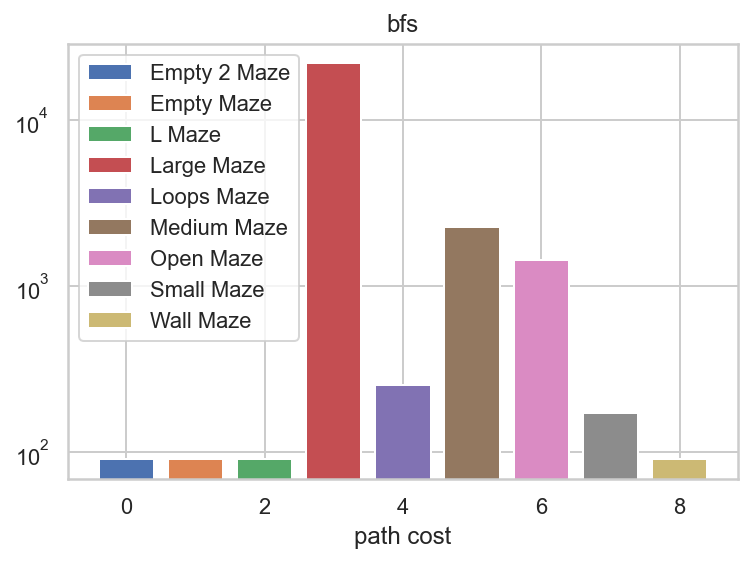

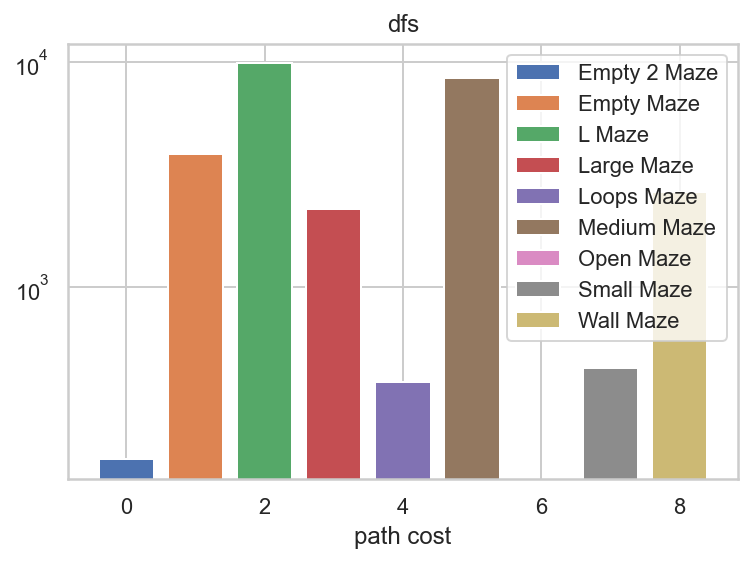

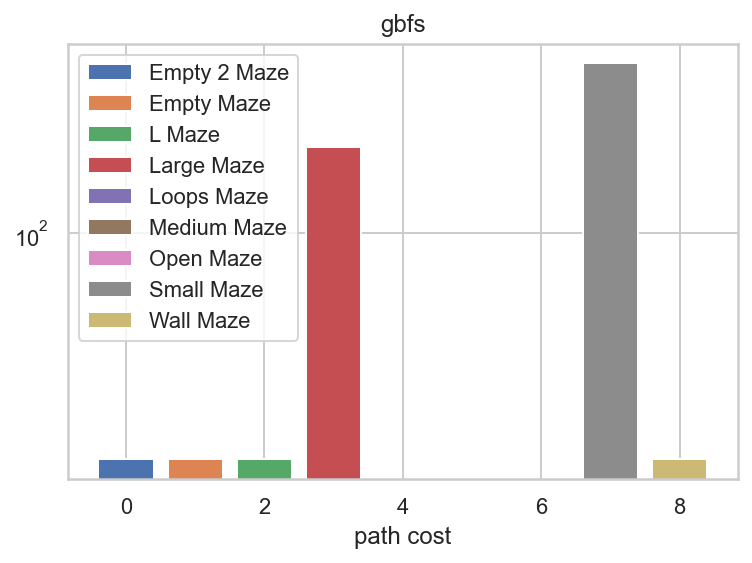

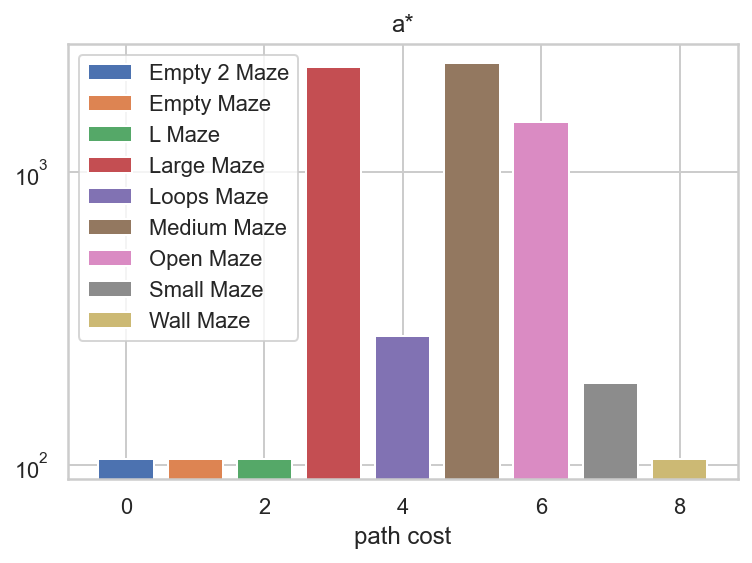

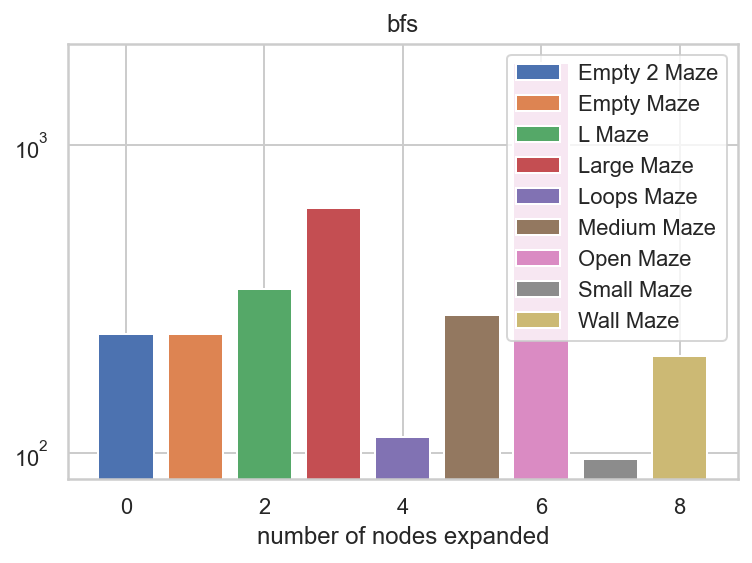

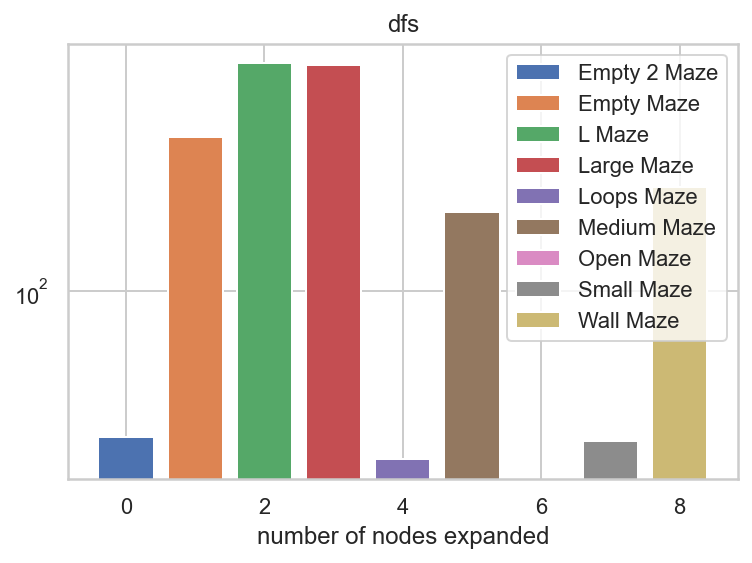

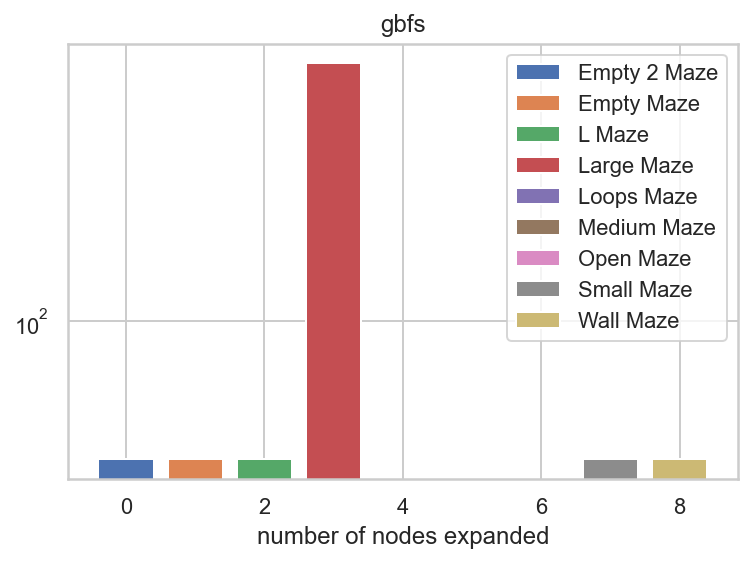

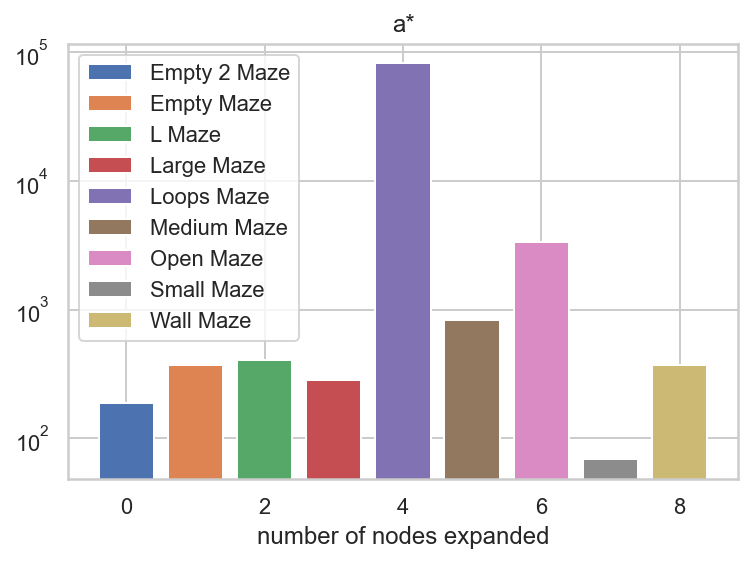

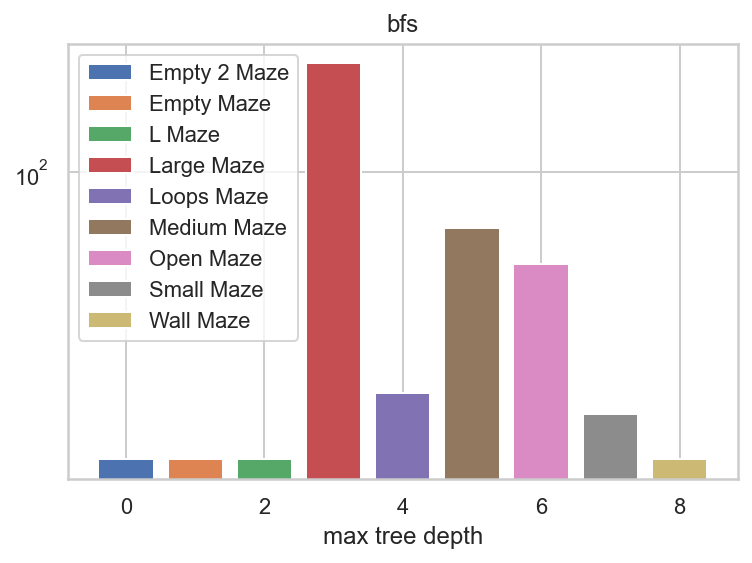

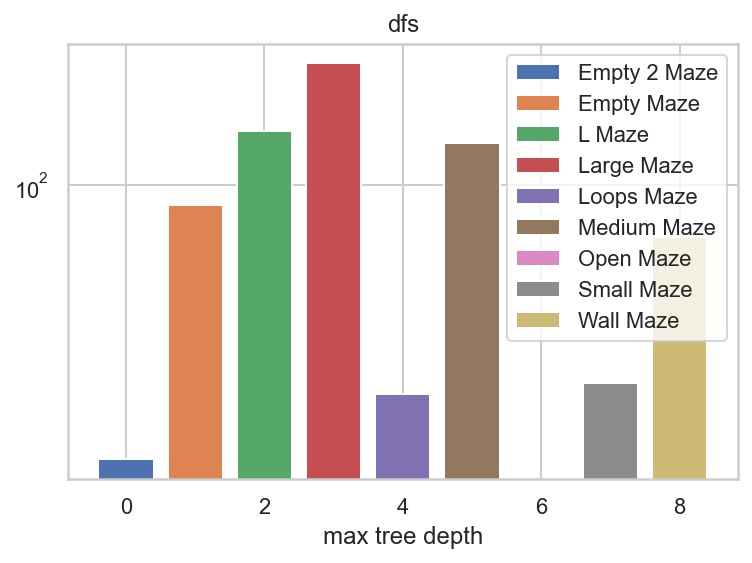

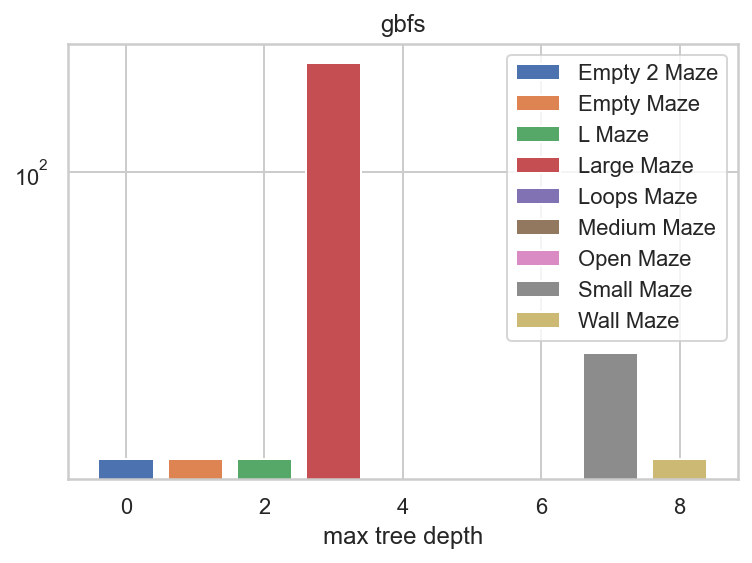

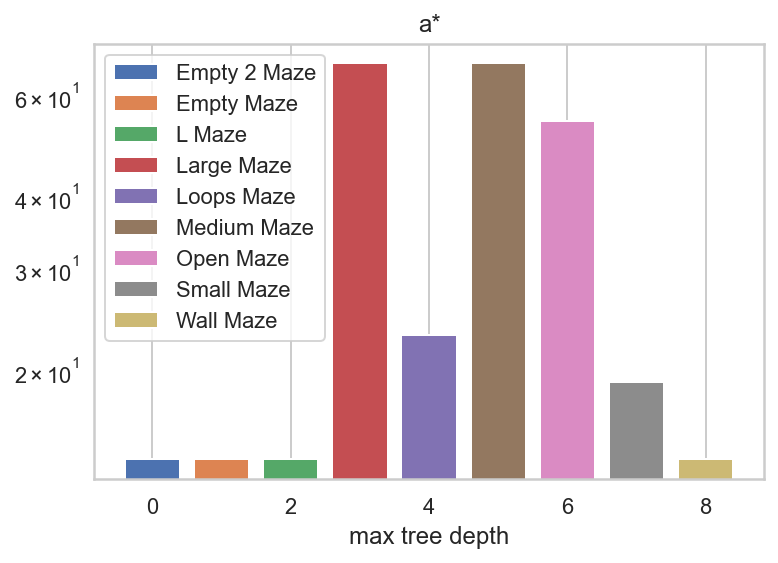

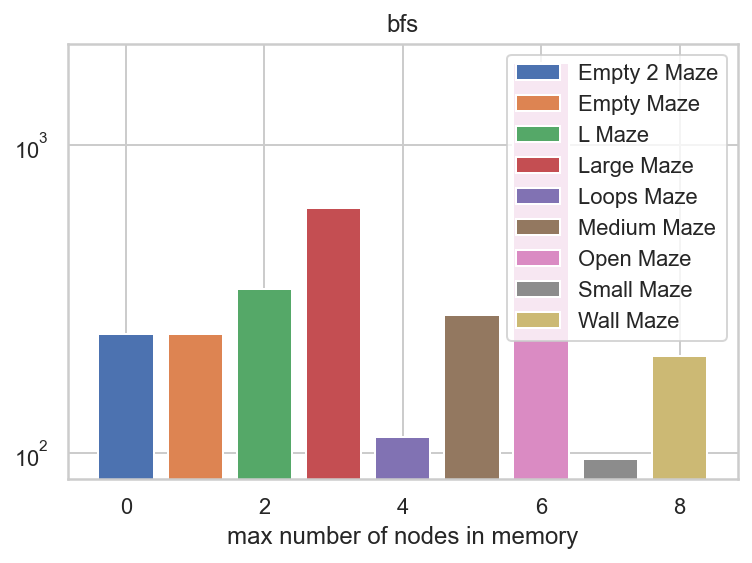

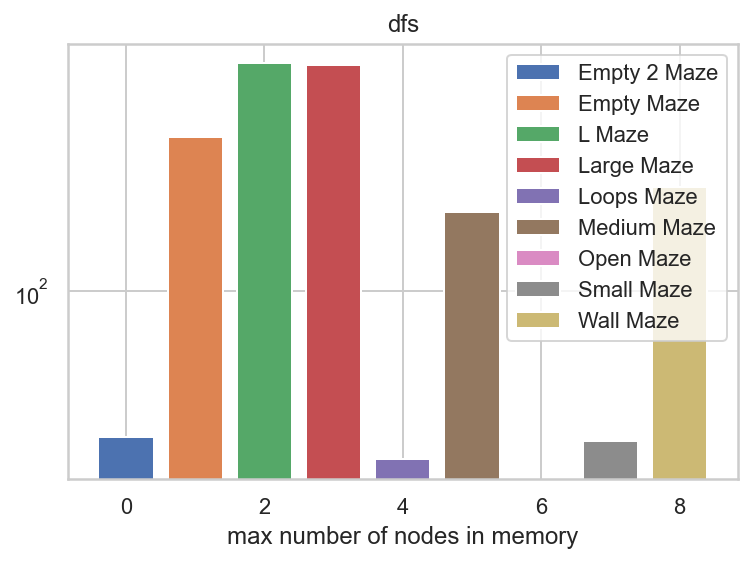

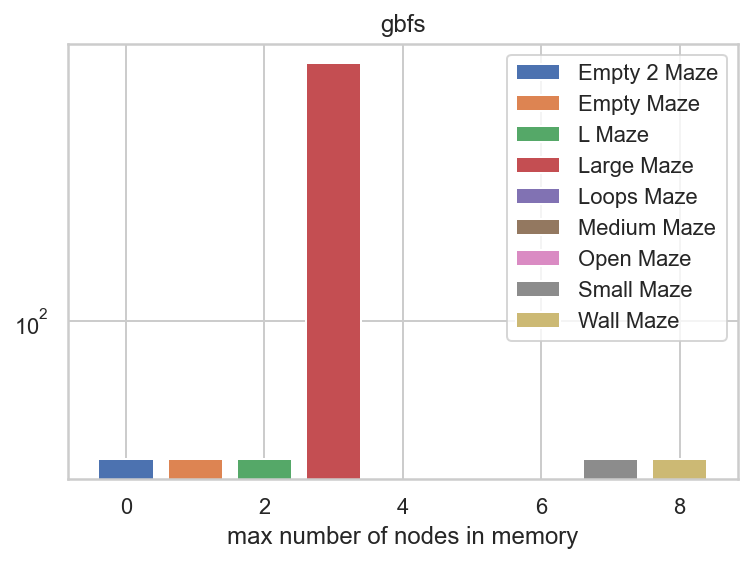

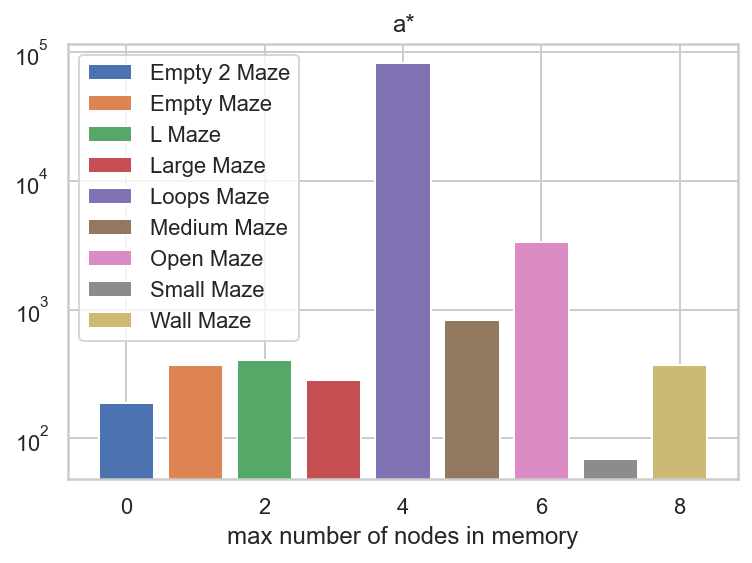

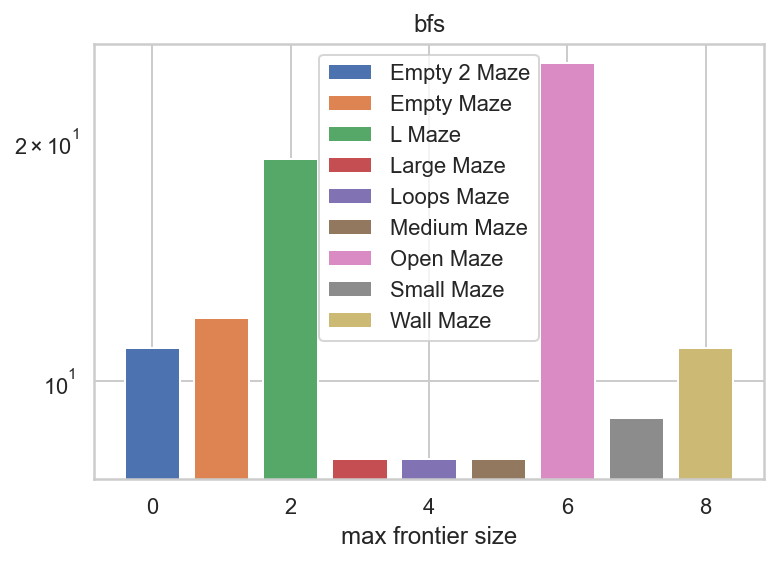

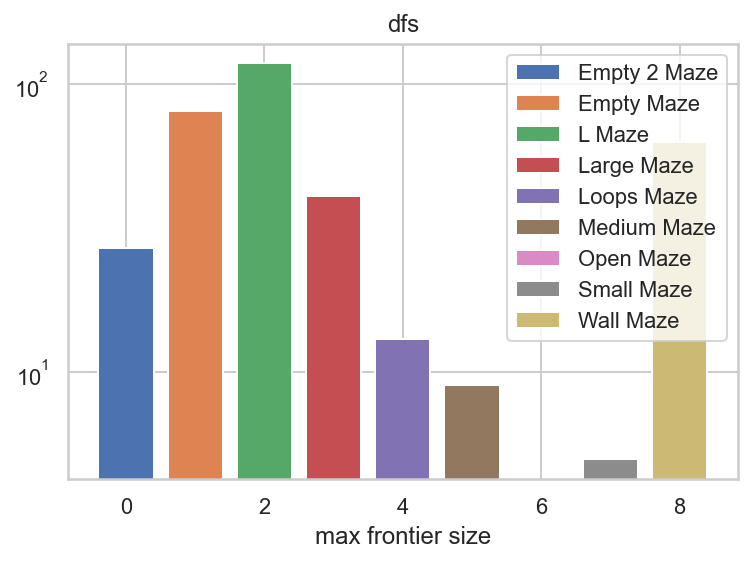

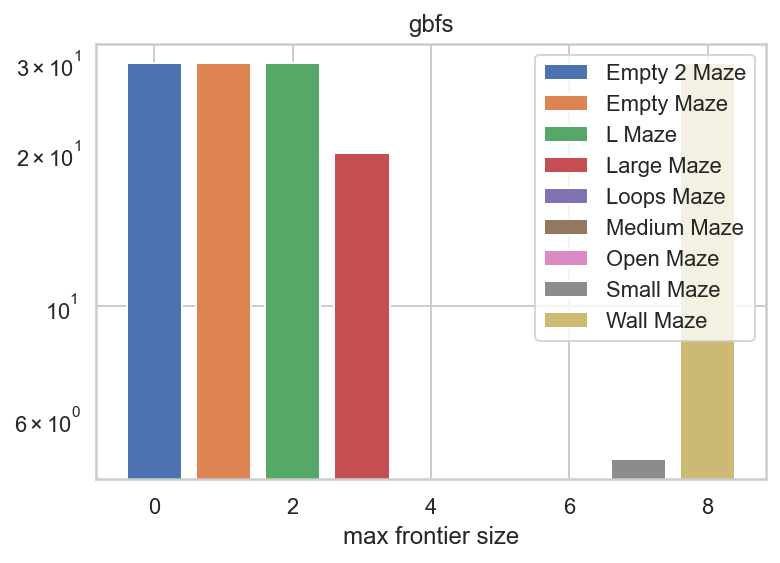

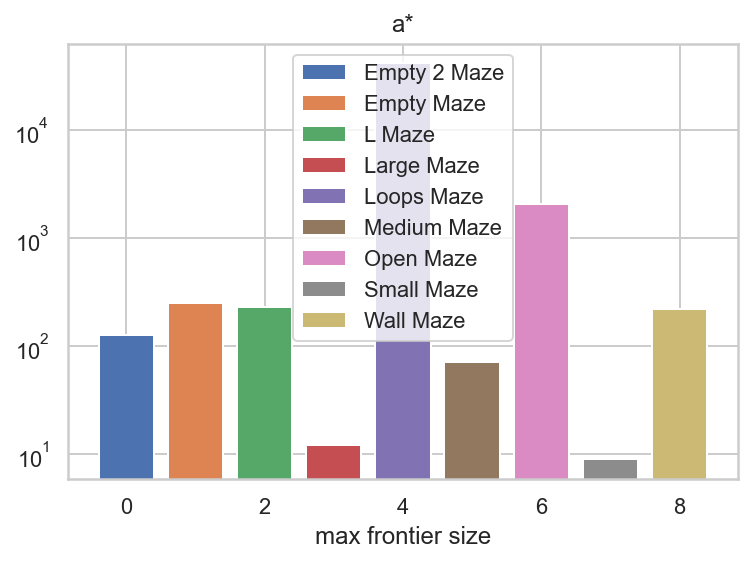

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

attributes = ["path cost","number of nodes expanded","max tree depth","max number of nodes in memory","max frontier size"]
bfs = [[91,91,91,21945,253,2278,1431,171,91],
       [244,243,341,621,113,281,1831,96,206],
       [14,14,14,210,22,68,53,19,14],
       [244,243,341,621,113,281,1831,96,206],
       [11,12,19,8,8,8,25,9,11]]
dfs = [[171,3916,9870,2215,378,8515,0,435,2628],
       [44,238,360,357,39,156,0,43,180],
       [18,88,140,214,27,130,0,29,72],
       [44,238,360,357,39,156,0,43,180],
       [27,81,118,41,13,9,0,5,63]]
gbfs = [[14,14,14,210,0,0,0,435,14],
       [43,43,43,486,0,0,0,43,43],
       [14,14,14,210,0,0,0,29,14],
       [43,43,43,486,0,0,0,43,43],
       [30,30,30,20,0,0,0,5,30]]
astar = [[105,105,105,2278,276,2346,1485,190,105],
       [187,370,402,281,81948,833,3325,69,370],
       [14,14,14,68,23,68,54,19,14],
       [187,370,402,281,81948,833,3325,69,370],
       [126,248,231,12,41201,71,2057,9,219]]
mazes = ["Empty 2 Maze","Empty Maze","L Maze"
                             "","Large Maze","Loops Maze","Medium Maze","Open Maze","Small Maze","Wall Maze"]
for i in range(len(astar)):
    plt.xlabel(attributes[i])
    plt.semilogy()
    plt.title("bfs")
    for j in range(len(astar[i])):
        plt.bar(j,bfs[i][j],label = mazes[j])
    plt.legend()
    plt.show()

    plt.xlabel(attributes[i])
    plt.semilogy()
    plt.title("dfs")
    for j in range(len(astar[i])):
        plt.bar(j,dfs[i][j],label = mazes[j])
    plt.legend()
    plt.show()

    plt.xlabel(attributes[i])
    plt.semilogy()
    plt.title("gbfs")
    for j in range(len(astar[i])):
        plt.bar(j,gbfs[i][j],label = mazes[j])
    plt.legend()
    plt.show()

    plt.xlabel(attributes[i])
    plt.semilogy()
    plt.title("a*")
    for j in range(len(astar[i])):
        plt.bar(j,astar[i][j],label = mazes[j])
    plt.legend()
    plt.show()



Discuss the most important lessons you have learned from implementing the different search strategies. 

What I have learned is that breadth-first search is surprisingly more efficient than I thought. It can take forever for a depth-first search to complete, and it is incredibly more simple than informed searches, so it seems to be a very viable search tactic if the goal is unknown.

With that being said, greedy best-first search is very overhyped. A* worked way better and was always able to find a solution in a reasonable time, despite the heuristic being so similar. Like I said earlier, the problem with greedy best first search is it never takes into account the past knowledge of the algorithm, only what gets it in the right direction.


## Graduate student advanced task: IDS and Multiple goals [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Create a few mazes with multiple goals by adding one or two more goals to the medium size maze.
Solve the maze with your implementations for DFS, BFS, and implement in addition IDS (iterative deepening search using DFS). 

Run experiments to show which implementations find the optimal solution and which do not. Discuss why that is the case.

In [40]:
def Iterative_Depth_First_Search(maze):
    def Depth_Limited_Search(maze, size):
        def is_cycle(node): #returns true if there is a cycle, false otherwise
            position = node.pos
            curr = node
            while curr.parent is not None:
                curr = curr.parent
                if curr.pos == position:
                    return True
            return False

        directions = {"down",  "up",  "left",  "right"}
        xdelta = {"up":-1,  "down":1,  "left":0,  "right":0}
        ydelta = {"up":0,  "down":0,  "left":-1,  "right":1}

        root = Node(mh.find_pos(maze,"S"),None,None,0)
        frontier = [root]
        while len(frontier)>0:
            curr = frontier.pop()
            if mh.look(maze,curr.pos)=='G':
                return curr
            if len(curr.get_path_from_root())>size:
                return "failure"
            else:
                if not is_cycle(curr):
                    for move in directions:
                        if mh.look(maze,(curr.pos[0]+xdelta[move],  curr.pos[1]+ydelta[move])) != 'X':
                            next = Node((curr.pos[0]+xdelta[move],  curr.pos[1]+ydelta[move]),curr,move,curr.cost+1)
                            frontier.append(next)
        return "failure"

    cutoff = 1000
    for i in range(cutoff):
        result = Depth_Limited_Search(maze,i)
        if result != "failure":
            return result
    return "failure"

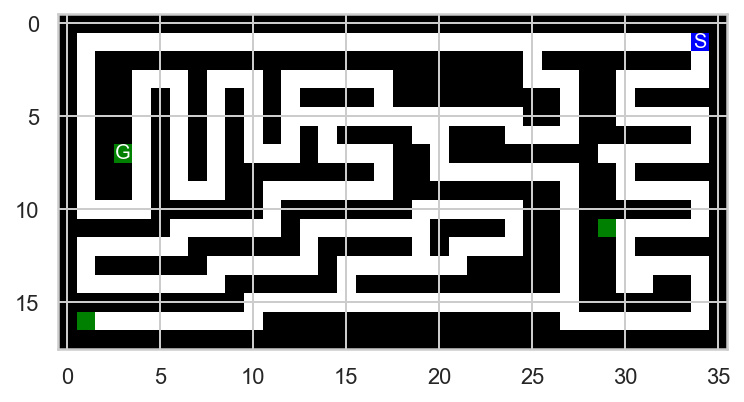

bfs {'Path Cost': 465, '# of Nodes': 100, 'Max_Depth': 31, '# Nodes in memory': 0, 'Frontier Size': 6}
dfs {'Path Cost': 30381, '# of Nodes': 286, 'Max_Depth': 246, '# Nodes in memory': 0, 'Frontier Size': 13}
gbfs {'Path Cost': 49, '# of Nodes': 52, 'Max_Depth': 49, '# Nodes in memory': 0, 'Frontier Size': 4}
aSs {'Path Cost': 1225, '# of Nodes': 235, 'Max_Depth': 49, '# Nodes in memory': 0, 'Frontier Size': 29}
ids passed


In [41]:
grad_maze = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX\nX                                 SX\nX XXXXXXXXXXXXXXXXXXXXXXX XXXXXXXX X\nX XX   X   X      XXXXXXX   XX     X\nX XX X X X X XXXX XXXXXXXXX XX XXXXX\nX XX X X X X             XX XX     X\nX XX X X X X X XXXX  XXX    XXXXXX X\nX XG X X X   X    XX XXXXXXXX      X\nX XX X X XXXXXXXX XX        XX XXXXX\nX XX X   XX       XXXXXXXXX XX     X\nX    XXXXXX XXXXXXX      XX XXXXXX X\nXXXXXX      X       XXXX XX XG     X\nX      XXXXXX XXXXX X    XX XX XXXXX\nX XXXXXX      X       XXXXX XX     X\nX        XXXXXX XXXXXXXXXXX XX  XX X\nXXXXXXXXXX                  XXXXXX X\nXG         XXXXXXXXXXXXXXXX        X\nXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

mh.show_maze(mh.parse_maze(grad_maze))

maze = grad_maze
bfs = breadth_first_search(np.copy(mh.parse_maze(maze)))
print("bfs",(bfs if bfs!="failure" else "failed"))
dfs = depth_first_search(np.copy(mh.parse_maze(maze)))
print("dfs",(dfs if dfs!="failure" else "failed"))
gbfs = greedy_best_first_search(np.copy(mh.parse_maze(maze)))
print("gbfs",(gbfs if gbfs!="failure" else "failed"))
aSs = A_star_search(np.copy(mh.parse_maze(maze)))
print("aSs",(aSs if aSs!="failure" else "failed"))
ids = Iterative_Depth_First_Search((np.copy(mh.parse_maze(maze))))
print("ids",("passed" if ids!="failure" else "failed"))


## More advanced tasks to think about

Instead of defining each square as a state, use only intersections as states. Now the storage requirement is reduced, but the path length between two intersections can be different. If we use total path length measured as the number of squares as path cost, how can we make sure that BFS and iterative deepening search is optimal? Change the code to do so.

In [18]:
# Your code/answer goes here

Modify your A* search to add weights (see text book) and explore how different weights influence the result.

In [19]:
# Your code/answer goes here

What happens if the agent does not know the layout of the maze in advance (i.e., faces an unkown, only partially observable environment)? How does the environment look then (PEAS description)? How would you implement a rational agent to solve the maze? What if the agent still has a GPS device to tell the distance to the goal?

In [20]:
# Your code/answer goes here